# Dependencias

In [41]:
%pip install scipy numpy matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Definición de funciones

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

def calculate_contribution_matrix(D, alpha):
    return 1 / (D ** alpha) # se realiza el cálculo de U_ij para cada punto i y j

def greedy_algorithm_optimized(A, n, alpha):
    m = len(A)
    D = distance_matrix(A, A)  # se precalcula la matriz de distancia euclidiana

    np.fill_diagonal(D, np.inf)  # se llena la diagonal con infinito para evitar dividir por 0
    
    U_matrix = calculate_contribution_matrix(D, alpha) # se calcula la matriz de contribución U_ij
    U_sum = np.sum(U_matrix, axis=1)  # arreglo de la suma de todos los valores de U para cada punto

    indices = list(range(m))  # lista para saber qué puntos se han seleccionado y elimindado

    while len(indices) > n:
        worst_index = np.argmax(U_sum) # se obtiene el índice del punto con el valor más grande
        
        U_sum -= U_matrix[:, worst_index]  # se le resta el valor del punto eliminado a U para no tener que recalcular la matriz

        indices.pop(worst_index) # se elimina el punto de la lista de indices
        
        # borrar los valores de la matriz y del arreglo de suma asociados al punto eliminado
        U_matrix = np.delete(U_matrix, worst_index, axis=0)
        U_matrix = np.delete(U_matrix, worst_index, axis=1)
        U_sum = np.delete(U_sum, worst_index)

    # retornar una matriz con los puntos seleccionados
    return np.array([A[i] for i in indices])


# Selección de sub conjunto de puntos en 2D

In [43]:
# obtener conjunto de puntos en 2D
A2d = np.loadtxt("ZCAT1_1000_02D.pof")
n = 100 # número de puntos a seleccionar
alpha = 2

S_star2d = greedy_algorithm_optimized(A2d, n, alpha)

Text(0.5, 1.0, 'Puntos originales')

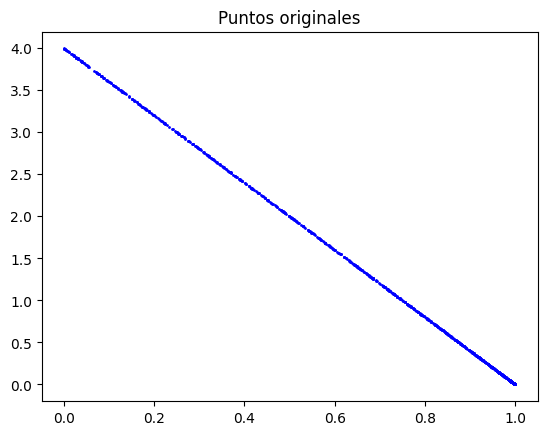

In [44]:
plt.scatter(A2d[:, 0], A2d[:, 1], s=1, c='b')
plt.title("Puntos originales")

Text(0.5, 1.0, 'Puntos seleccionados')

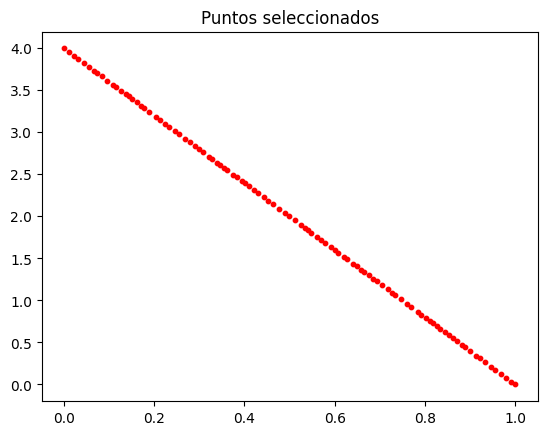

In [45]:
plt.scatter(S_star2d[:, 0], S_star2d[:, 1], s=10, c='r')
plt.title("Puntos seleccionados")

# Selección de sub conjunto de puntos en 3D

In [46]:
# función para mostrar el gráfico en 3d
def plot_3d_points(array, color):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x_coords = [point[0] for point in array]
    y_coords = [point[1] for point in array]
    z_coords = [point[2] for point in array]

    ax.scatter(x_coords, y_coords, z_coords, c=color, marker='o')

In [47]:
# obtener conjunto de puntos en 3D
A3d = np.loadtxt("ZCAT1_1000_03D.pof")
n = 100 # número de puntos a seleccionar
alpha = 2

S_star3d = greedy_algorithm_optimized(A3d, n, alpha)

Text(0.5, 0.92, 'Puntos originales')

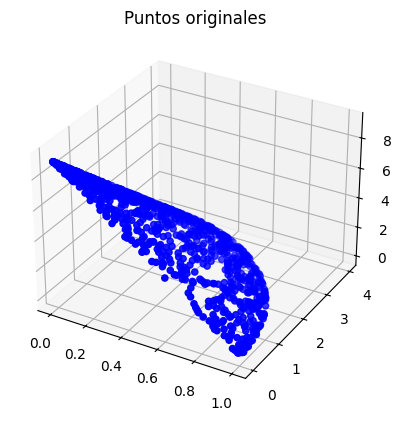

In [48]:
plot_3d_points(A3d, 'b')
plt.title("Puntos originales")

Text(0.5, 0.92, 'Puntos seleccionados')

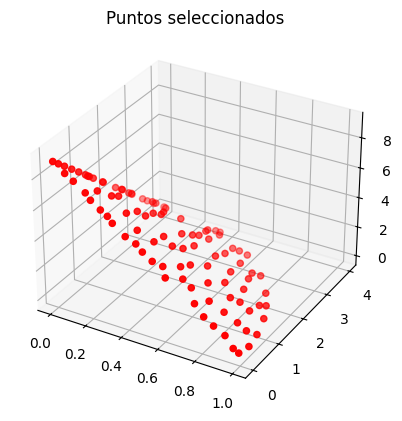

In [49]:
plot_3d_points(S_star3d, 'r')
plt.title("Puntos seleccionados")